# Logistic Regression All Features

No standardisation

Default parameteres in logistic regression

Pre-requisite: nommesen_april-week2-prepare_data.ipynb

In [40]:
import pandas as pd
import numpy as np
import math

# SKLearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import joblib


## Loading the training data set

In [2]:
alltrain = np.load('../data/processed/alltrain.npy')

print("Dimension of training data - unsplit", alltrain.shape)

df_alltrain = pd.DataFrame(alltrain, 
             columns=['ID',
                 'Games Played', 
    'Minutes Played',
    'Points Per Game',
    'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    '3Points Percent',
    'Free Throw Made',
    'Free Throw Attempts',
    'Free Throw Percent',
    'Offensive Rebounds',
    'Defensive Rebounds',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers',
     'TARGET_5Yrs'
                     ])

df_alltrain['TARGET_5Yrs'] = df_alltrain['TARGET_5Yrs'].astype(dtype ='int64')
df_alltrain['ID'] = df_alltrain['ID'].astype(dtype ='str')

df_alltrain.head()

Dimension of training data - unsplit (8000, 21)


,ID,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,3799.0,80.0,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,3800.0,75.0,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,3801.0,85.0,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,3802.0,63.0,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,3803.0,63.0,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


## Feature selection
All features are used

In [3]:
target = df_alltrain.pop('TARGET_5Yrs')
features = df_alltrain[['Games Played', 
    'Minutes Played',
    'Points Per Game',
    'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    '3Points Percent',
    'Free Throw Made',
    'Free Throw Attempts',
    'Free Throw Percent',
    'Offensive Rebounds',
    'Defensive Rebounds',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers']]

# target.info()
# features.info()

In [4]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8000 entries, 0 to 7999
Series name: TARGET_5Yrs
Non-Null Count  Dtype
--------------  -----
8000 non-null   int64
dtypes: int64(1)
memory usage: 62.6 KB


In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Games Played          8000 non-null   float64
 1   Minutes Played        8000 non-null   float64
 2   Points Per Game       8000 non-null   float64
 3   Field Goals Made      8000 non-null   float64
 4   Field Goals Attempts  8000 non-null   float64
 5   Field Goals Percent   8000 non-null   float64
 6   3Points Made          8000 non-null   float64
 7   3Points Attempts      8000 non-null   float64
 8   3Points Percent       8000 non-null   float64
 9   Free Throw Made       8000 non-null   float64
 10  Free Throw Attempts   8000 non-null   float64
 11  Free Throw Percent    8000 non-null   float64
 12  Offensive Rebounds    8000 non-null   float64
 13  Defensive Rebounds    8000 non-null   float64
 14  Rebounds              8000 non-null   float64
 15  Assists              

## Splitting data
Split randomly the dataset with random_state=8 into 2 different sets: training data (80%) and validation data (20%)

In [6]:
X_train, X_val, y_train, y_val = train_test_split (features, 
                                                   target,
                                                   test_size=0.2,
                                                   random_state=8
                                                  )

print("Dimension of features training data", X_train.shape)
print("Dimension of target training data", y_train.shape)
print("Dimension of features validation data", X_val.shape)
print("Dimension of targer validation data", y_val.shape)

Dimension of features training data (6400, 19)
Dimension of target training data (6400,)
Dimension of features validation data (1600, 19)
Dimension of targer validation data (1600,)


In [7]:
X_train

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
3617,64.0,13.9,4.3,1.5,3.6,43.0,-0.2,-0.1,11.9,1.4,1.9,69.2,0.6,1.7,2.2,0.6,0.4,0.1,0.7
1120,81.0,20.8,7.6,2.7,6.2,44.8,0.4,1.1,12.1,1.8,2.1,79.0,1.7,4.0,5.6,0.7,0.6,0.1,1.3
3873,50.0,5.6,1.4,0.5,1.5,36.4,0.0,0.5,-3.1,0.2,0.2,68.6,0.1,0.2,0.4,1.5,0.4,-0.3,0.3
153,72.0,19.3,5.0,2.0,5.0,40.4,0.1,0.5,25.3,0.9,1.6,48.4,0.7,2.0,2.9,1.1,0.5,0.2,0.9
2960,45.0,19.7,6.1,2.5,5.9,42.1,0.1,0.4,-2.7,1.1,1.7,62.0,1.0,1.5,2.6,1.5,0.4,0.3,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,74.0,46.4,18.7,7.4,16.3,45.3,0.8,2.3,42.2,3.1,4.5,68.0,1.9,6.2,8.4,3.4,1.4,0.3,3.0
2409,59.0,14.8,3.4,1.0,3.2,33.7,0.5,1.7,14.3,1.3,2.0,56.3,0.7,1.2,2.1,1.5,0.9,0.1,0.7
2033,55.0,15.6,3.3,1.1,2.4,44.4,0.6,1.8,32.0,0.7,1.0,72.7,1.1,2.3,3.3,1.0,0.5,0.3,0.8
1364,91.0,47.9,12.1,4.2,9.6,46.0,0.4,1.3,-0.6,3.2,4.6,66.4,3.0,6.5,9.8,4.2,0.9,0.6,1.6


## Model Development and Prediction

Using default parameters

In [8]:
# instantiate the model (using the default parameters)
logreg0_train = LogisticRegression(random_state=16)
logreg0_val = LogisticRegression(random_state=16)

# fit the model with data
logreg0_train.fit(X_train, y_train)
# logreg0_val.fit(X_val, y_val)


# y_pred_ontrain = logreg0_train.predict(X_train) 
y_pred_onval = logreg0_train.predict(X_val) # official

# y_proba_ontrain = logreg0_train.predict_proba(X_train) 
# y_proba_onval = logreg0_train.predict_proba(X_val) # official


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
y_pred_onval

array([1, 1, 1, ..., 1, 1, 1])

## Model Evaluation

### Confusion Matrix

In [11]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred_onval)
cnf_matrix


array([[   4,  253],
       [   4, 1339]])

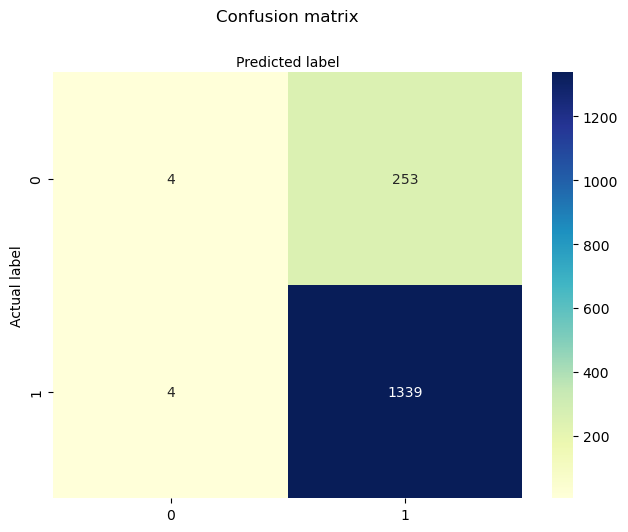

In [12]:
class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

### Accuracy, Precision, and Recall

In [13]:
target_names = ['career years played < 5', 'career years played >= 5']
print(classification_report(y_val, y_pred_onval, target_names=target_names))

                          precision    recall  f1-score   support

 career years played < 5       0.50      0.02      0.03       257
career years played >= 5       0.84      1.00      0.91      1343

                accuracy                           0.84      1600
               macro avg       0.67      0.51      0.47      1600
            weighted avg       0.79      0.84      0.77      1600



### ROC

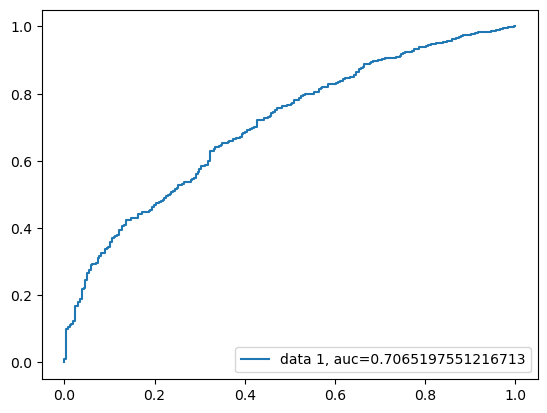

In [14]:
# y_pred_proba = logreg.predict_proba(X_test)[::,1]
y_proba_onval = logreg0_train.predict_proba(X_val)[::,1]  # official
fpr, tpr, _ = metrics.roc_curve(y_val,  y_proba_onval)
auc = metrics.roc_auc_score(y_val, y_proba_onval)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Kaggle Submission

In [18]:
# save the model to disk
my_model_filename = '../models/logreg0.sav'
joblib.dump(logreg0_train, my_model_filename)

['../models/logreg0.sav']

## Loading the test data set

In [60]:
test = np.load('../data/processed/test.npy')

print("Dimension of training data - unsplit", test.shape)

df_test = pd.DataFrame(test, 
             columns=['ID',
                 'Games Played', 
    'Minutes Played',
    'Points Per Game',
    'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    '3Points Percent',
    'Free Throw Made',
    'Free Throw Attempts',
    'Free Throw Percent',
    'Offensive Rebounds',
    'Defensive Rebounds',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers'
                     ])

df_test['ID'] = df_test['ID'].astype(int)
df_test['ID'] = df_test['ID'].astype(str)

# df_test_indexed=df_test.set_index('ID')

df_test.head()

Dimension of training data - unsplit (3799, 20)


,ID,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,0,56.0,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,1,43.0,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,2,82.0,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,3,86.0,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,4,58.0,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    3799 non-null   object 
 1   Games Played          3799 non-null   float64
 2   Minutes Played        3799 non-null   float64
 3   Points Per Game       3799 non-null   float64
 4   Field Goals Made      3799 non-null   float64
 5   Field Goals Attempts  3799 non-null   float64
 6   Field Goals Percent   3799 non-null   float64
 7   3Points Made          3799 non-null   float64
 8   3Points Attempts      3799 non-null   float64
 9   3Points Percent       3799 non-null   float64
 10  Free Throw Made       3799 non-null   float64
 11  Free Throw Attempts   3799 non-null   float64
 12  Free Throw Percent    3799 non-null   float64
 13  Offensive Rebounds    3799 non-null   float64
 14  Defensive Rebounds    3799 non-null   float64
 15  Rebounds             

In [62]:
df_features_test = df_test[['Games Played', 
    'Minutes Played',
    'Points Per Game',
    'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    '3Points Percent',
    'Free Throw Made',
    'Free Throw Attempts',
    'Free Throw Percent',
    'Offensive Rebounds',
    'Defensive Rebounds',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers']]

df_features_test.head()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,56.0,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,43.0,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,82.0,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,86.0,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,58.0,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


In [63]:
# Load the model from the file 
logreg0_from_joblib = joblib.load('../models/model-logreg0.sav') 

# Use the loaded model to make predictions 
# print("After save:",logreg0_from_joblib.predict(X_test))
y_test = logreg0_from_joblib.predict_proba(df_features_test)

In [64]:
y_test

array([[0.18810369, 0.81189631],
       [0.19035325, 0.80964675],
       [0.08675417, 0.91324583],
       ...,
       [0.22216868, 0.77783132],
       [0.03853184, 0.96146816],
       [0.23351252, 0.76648748]])

In [75]:
df_test_probabilites = pd.DataFrame(y_test, 
             columns=['TARGET_5Yrs_0',
                 'TARGET_5Yrs'
                     ])

In [76]:
df_test_probabilites.head()

,TARGET_5Yrs_0,TARGET_5Yrs
0,0.188104,0.811896
1,0.190353,0.809647
2,0.086754,0.913246
3,0.055663,0.944337
4,0.216521,0.783479


In [80]:
output = df_test.join(df_test_probabilites)
output=output.set_index('ID')

output

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,...,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs_0,TARGET_5Yrs
ID,,,,,,,,,,,,,,,,,,,,,
0,56.0,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,...,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8,0.188104,0.811896
1,43.0,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,...,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8,0.190353,0.809647
2,82.0,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,...,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0,0.086754,0.913246
3,86.0,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,...,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6,0.055663,0.944337
4,58.0,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,...,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9,0.216521,0.783479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,84.0,21.2,8.7,3.4,6.7,50.2,0.0,0.0,-4.5,1.7,...,68.1,1.9,2.3,3.9,1.5,0.6,0.3,2.0,0.054827,0.945173
3795,49.0,16.3,6.4,2.9,6.6,44.4,-0.1,-0.4,19.8,1.0,...,50.2,1.7,2.8,4.4,0.4,0.4,0.4,0.7,0.212729,0.787271
3796,53.0,9.9,2.1,0.8,1.8,43.1,-0.4,-0.6,1.9,0.6,...,63.9,0.7,1.0,1.7,0.4,0.4,0.2,0.5,0.222169,0.777831


In [83]:
output['TARGET_5Yrs'].to_csv('../models/nommesen_april_week2_model-logreg0.csv')